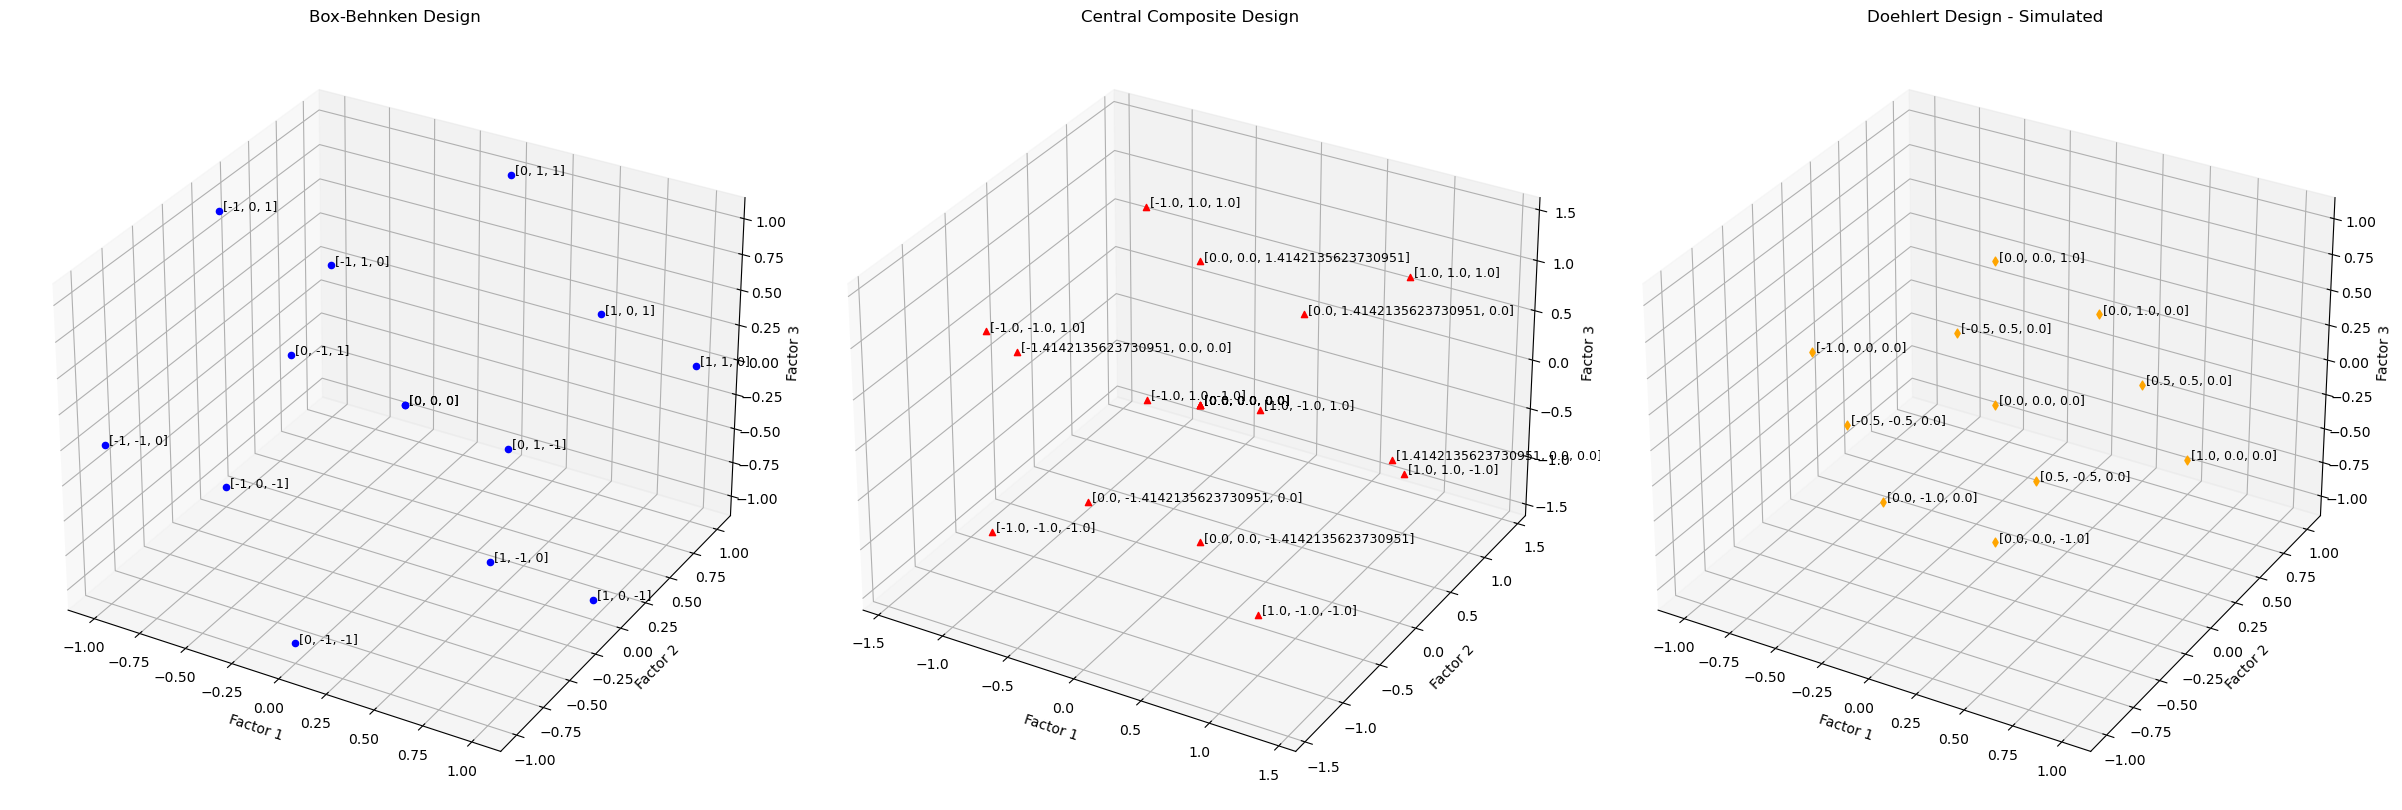

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generar Diseño Giratorio (Box-Behnken Design)
bbd_points = np.array([[-1, -1, 0], [-1, 1, 0], [1, -1, 0], [1, 1, 0],
                       [-1, 0, -1], [-1, 0, 1], [1, 0, -1], [1, 0, 1],
                       [0, -1, -1], [0, -1, 1], [0, 1, -1], [0, 1, 1],
                       [0, 0, 0], [0, 0, 0]])

# Generar Diseño Compuesto Central (Central Composite Design)
alpha = np.sqrt(2)
ccd_points = np.array([[-1, -1, -1], [-1, -1, 1], [-1, 1, -1], [-1, 1, 1],
                       [1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1],
                       [-alpha, 0, 0], [alpha, 0, 0], [0, -alpha, 0],
                       [0, alpha, 0], [0, 0, -alpha], [0, 0, alpha],
                       [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]])

# Generar puntos para el diseño de Doehlert (aproximación simplificada)
doehlert_points = np.array([
    [0, 0, 0],  # Punto central
    [1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0],  # Primer nivel
    [0.5, 0.5, 0], [-0.5, -0.5, 0], [0.5, -0.5, 0], [-0.5, 0.5, 0],  # Segundo nivel
    [0, 0, 1], [0, 0, -1]  # Eje Z
])

# Visualizar los tres diseños con etiquetas de coordenadas
fig = plt.figure(figsize=(24, 8))

# Función para añadir puntos y etiquetas
def add_points_with_labels(ax, points, color, marker):
    for point in points:
        ax.scatter(point[0], point[1], point[2], c=color, marker=marker)
        ax.text(point[0], point[1], point[2], f" [{point[0]}, {point[1]}, {point[2]}]", color='black', fontsize=9)

# Box-Behnken Design con etiquetas de coordenadas
ax1 = fig.add_subplot(131, projection='3d')
add_points_with_labels(ax1, bbd_points, 'b', 'o')
ax1.set_title("Box-Behnken Design")
ax1.set_xlabel("Factor 1")
ax1.set_ylabel("Factor 2")
ax1.set_zlabel("Factor 3")

# Central Composite Design con etiquetas de coordenadas
ax2 = fig.add_subplot(132, projection='3d')
add_points_with_labels(ax2, ccd_points, 'r', '^')
ax2.set_title("Central Composite Design")
ax2.set_xlabel("Factor 1")
ax2.set_ylabel("Factor 2")
ax2.set_zlabel("Factor 3")

# Doehlert Design con etiquetas de coordenadas
ax3 = fig.add_subplot(133, projection='3d')
add_points_with_labels(ax3, doehlert_points, 'orange', 'd')
ax3.set_title("Doehlert Design - Simulated")
ax3.set_xlabel("Factor 1")
ax3.set_ylabel("Factor 2")
ax3.set_zlabel("Factor 3")

plt.tight_layout()
plt.show()


In [39]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import warnings

# Ignorar las advertencias de características no válidas
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# Definición de la función objetivo con la opción de añadir ruido
def objective_function(x, add_noise=True):
    noise = np.random.normal(0, 0.1) if add_noise else 0.0
    return np.sin(1.5 * x[0]) + np.cos(1.5 * x[1]) - np.log(1 + abs(x[2])) + noise

# Generar puntos para los diseños experimentales
def generate_design_points(design):
    if design == 'bbd':
        # Box-Behnken Design Points
        points = np.array([[-1, -1, 0], [-1, 1, 0], [1, -1, 0], [1, 1, 0],
                           [-1, 0, -1], [-1, 0, 1], [1, 0, -1], [1, 0, 1],
                           [0, -1, -1], [0, -1, 1], [0, 1, -1], [0, 1, 1],
                           [0, 0, 0], [0, 0, 0]])
    elif design == 'ccd':
        # Central Composite Design Points
        alpha = np.sqrt(2)
        points = np.array([[-1, -1, -1], [-1, -1, 1], [-1, 1, -1], [-1, 1, 1],
                           [1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1],
                           [-alpha, 0, 0], [alpha, 0, 0], [0, -alpha, 0],
                           [0, alpha, 0], [0, 0, -alpha], [0, 0, alpha],
                           [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]])
    elif design == 'doehlert':
        # Doehlert Design Points (simplified)
        points = np.array([[0, 0, 0], [1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0], [0, 0, 1], [0, 0, -1]])
    else:
        points = np.array([[0, 0, 0]])
    return points

# Generar puntos para cada diseño
bbd_points = generate_design_points('bbd')
ccd_points = generate_design_points('ccd')
doehlert_points = generate_design_points('doehlert')

# Aplicar la función objetivo modificada para generar datos aleatorios
bbd_responses = np.apply_along_axis(objective_function, 1, bbd_points, True)
ccd_responses = np.apply_along_axis(objective_function, 1, ccd_points, True)
doehlert_responses = np.apply_along_axis(objective_function, 1, doehlert_points, True)

# Ajustar modelos de superficie de respuesta para cada diseño experimental
designs = {'bbd': (bbd_points, bbd_responses), 'ccd': (ccd_points, ccd_responses), 'doehlert': (doehlert_points, doehlert_responses)}
models = {}
for design, (points, responses) in designs.items():
    model = make_pipeline(PolynomialFeatures(2), LinearRegression())
    model.fit(points, responses)
    models[design] = model

# Realizar la optimización para cada diseño experimental
designs = ['bbd', 'ccd', 'doehlert']
opt_results = {}
for design in designs:
    points = generate_design_points(design)
    responses = np.apply_along_axis(lambda x: objective_function(x, add_noise=True), 1, points)
    df = pd.DataFrame(points, columns=['x1', 'x2', 'x3'])
    df['response'] = responses
    model = make_pipeline(PolynomialFeatures(2), LinearRegression())
    model.fit(df[['x1', 'x2', 'x3']], df['response'])
    
    # Optimización
    opt_result = minimize(lambda x: -model.predict(np.array(x).reshape(1, -1)), [0, 0, 0], method='BFGS')
    opt_results[design] = opt_result

# Imprimir los resultados de optimización para cada diseño
for design, result in opt_results.items():
    print(f"Results for {design.capitalize()} Design:")
    print(f"  Success: {result.success}")
    print(f"  Optimal value (negated response): {result.fun}")
    print(f"  Optimal coordinates: {result.x}")
    print(f"  Number of iterations: {result.nit}")
    print(f"  Number of function evaluations: {result.nfev}")
    print(f"  Optimal value (actual response): {-result.fun}\n")

# Evaluar el valor óptimo real de la función sin ruido en el punto de optimización para cada diseño
for design, result in opt_results.items():
    if result.success:
        real_value = objective_function(result.x, add_noise=False)
        print(f"Real optimal value of the objective function for {design.capitalize()} Design at {result.x}: {real_value}")

Results for Bbd Design:
  Success: True
  Optimal value (negated response): -5.300878815591965
  Optimal coordinates: [ 8.4275328  -0.18666964 -0.06012027]
  Number of iterations: 7
  Number of function evaluations: 32
  Optimal value (actual response): 5.300878815591965

Results for Ccd Design:
  Success: True
  Optimal value (negated response): -2.6646948875426713
  Optimal coordinates: [3.54313662 0.03465187 0.02517296]
  Number of iterations: 6
  Number of function evaluations: 28
  Optimal value (actual response): 2.6646948875426713

Results for Doehlert Design:
  Success: True
  Optimal value (negated response): -7.607721302860885
  Optimal coordinates: [12.55999908 -0.04632002  0.0483402 ]
  Number of iterations: 7
  Number of function evaluations: 36
  Optimal value (actual response): 7.607721302860885

Real optimal value of the objective function for Bbd Design at [ 8.4275328  -0.18666964 -0.06012027]: 0.9775303340107856
Real optimal value of the objective function for Ccd Des